#**Lab 0 - Sample Session**

In [1]:
# Load Modules
from skimage.io import imread, imsave
from skimage.color import rgb2gray
from skimage import filters
import matplotlib.pyplot as plt
import numpy as np
import cv2

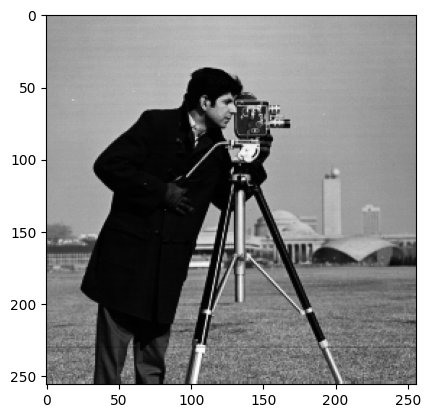

In [123]:
# Read in the cameraman image
A = imread('cameraman.tif')

# Display the image
plt.imshow(A, cmap='gray')

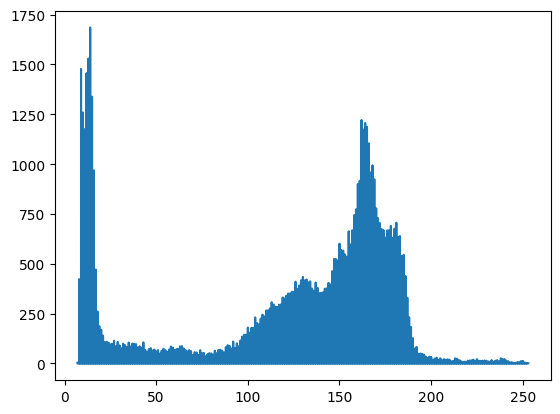

In [124]:
# Display that image’s histogram in the new window
hist, bins  = np.histogram(A, bins=10000)
plt.plot(bins[1:], hist)

In [125]:
# Find global statistics (mean, and standard deviation) on all the pixels in the image
m = np.mean(A)
s = np.std(A)
print("mean = %.2f, std = %.2f"%(m, s))

mean = 118.72, std = 62.34


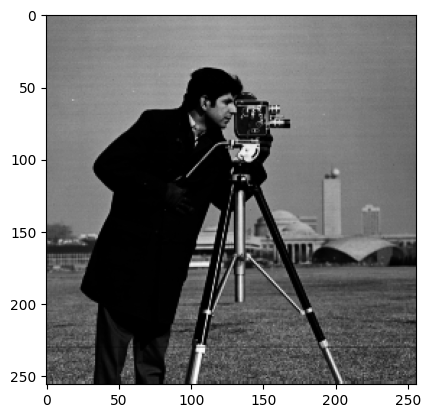

In [126]:
# Adjust image intensity
def imadjust(x,a,b,c,d,gamma=1):
    # Similar to imadjust in MATLAB.
    # Converts an image range from [a,b] to [c,d].
    # The Equation of a line can be used for this transformation:
    #   y=((d-c)/(b-a))*(x-a)+c
    # However, it is better to use a more generalized equation:
    #   y=((x-a)/(b-a))^gamma*(d-c)+c
    # If gamma is equal to 1, then the line equation is used.
    # When gamma is not equal to 1, then the transformation is not linear.

    return (((x - a) / (b - a)) ** gamma) * (d - c) + c

gamma = 1.5
# with gamma < 1
# or   gamma > 1
B = imadjust(A, A.min(), A.max(), 0, 1, gamma)
plt.imshow(B, cmap='gray')

**Comments:** We can see from the figure how gamma = 1.5 stretched light regions, making them darker.

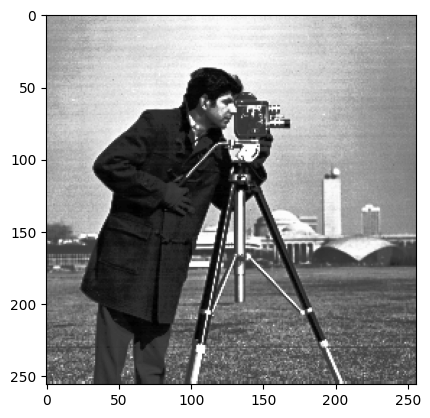

In [127]:
# Equalize the histogram
B = cv2.equalizeHist(A)
plt.imshow(B, cmap='gray')

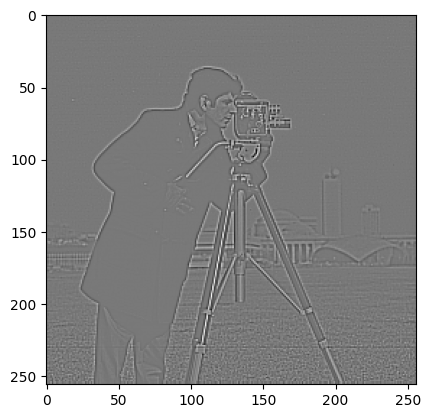

In [128]:
# Smooth the image with local average mask
kernel_size = 3  # Adjust this for different filter sizes
C = filters.rank.mean(A, np.ones((kernel_size, kernel_size)))
C = C / 255

# Find edges using (image - smoothed image)
D = A.astype('float') / 255 - C
plt.imshow(D + 0.5, cmap='gray')

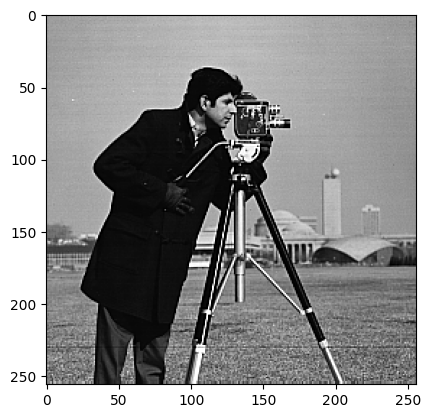

In [129]:
# Enhance the edges
E = A.astype('float') / 255 + D
plt.imshow(E, cmap='gray', vmin=0, vmax=1)

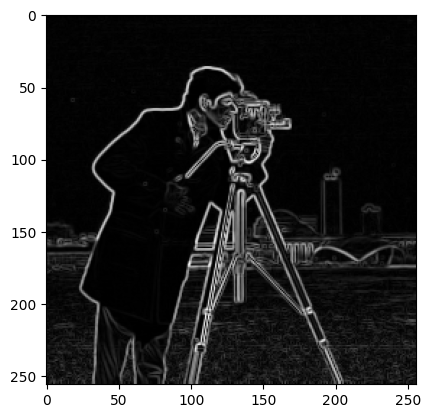

In [130]:
# Find horizontal edges with sobel operator
F = filters.sobel_h(A) / 255

# Find vertical edges with sobel operator
G = filters.sobel_v(A) / 255

# Create an edge image with the gradient magnitude
I = np.sqrt(F**2 + G**2)
plt.imshow(I, cmap='gray')